<a href="https://colab.research.google.com/github/IronZiiz/computing_physics_methods/blob/main/Aula_6_equation_roots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt


## Def func

In [3]:
def f(x):
  return x**2 - 4
def df(x):
  return 2*x

## Plot the func

Text(0, 0.5, 'y')

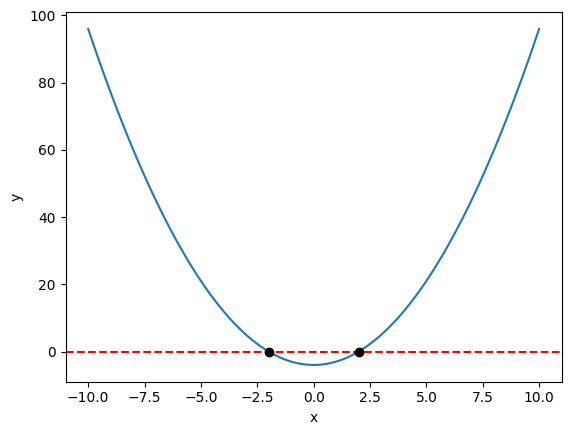

In [4]:
x  = np.linspace(-10, 10, 100)
y = f(x)
plt.plot(x, y)
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(-2, 0,marker= 'o', color = "black")
plt.plot(2,0, marker= 'o', color = "black")
plt.xlabel('x')
plt.ylabel('y')

## bissection method

In [84]:
def my_bissecao(f,a,b,max_iter = 1000, tol = 1e-9):
  xs=[]
  if f(a)*f(b) >=0:
    raise ValueError('f(a) e f(b) devem ter sinais opostos ')
  for _ in range(max_iter):
    c = (a+b) /2
    xs.append(c)
    if abs(f(c)) < tol or (b-a)/2 <tol:
      break
    if f(a) * f(c) < 0:
      b = c
    else:
      a = c
  return np.array(xs)


In [6]:
my_bissecao(f,0,5)

[2.5,
 1.25,
 1.875,
 2.1875,
 2.03125,
 1.953125,
 1.9921875,
 2.01171875,
 2.001953125,
 1.9970703125,
 1.99951171875,
 2.000732421875,
 2.0001220703125,
 1.99981689453125,
 1.999969482421875,
 2.0000457763671875,
 2.0000076293945312,
 1.9999885559082031,
 1.9999980926513672,
 2.000002861022949,
 2.000000476837158,
 1.9999992847442627,
 1.9999998807907104,
 2.0000001788139343,
 2.0000000298023224,
 1.9999999552965164,
 1.9999999925494194,
 2.000000011175871,
 2.000000001862645,
 1.9999999972060323,
 1.9999999995343387,
 2.000000000698492,
 2.0000000001164153]

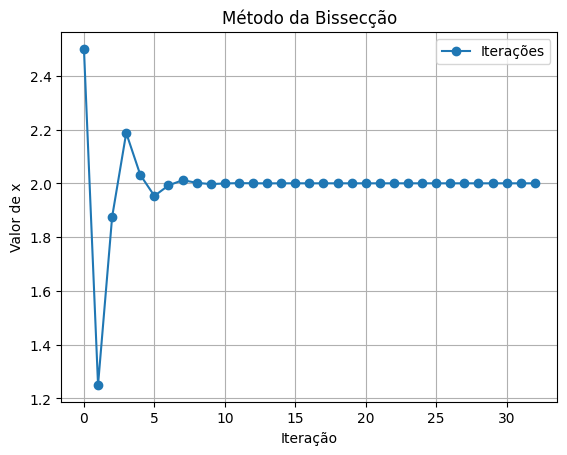

In [7]:
xs= my_bissecao(f,0,5)

plt.plot(xs, 'o-', label='Iterações')
plt.xlabel('Iteração')
plt.ylabel('Valor de x')
plt.title('Método da Bissecção')
plt.legend()
plt.grid(True)
plt.show()

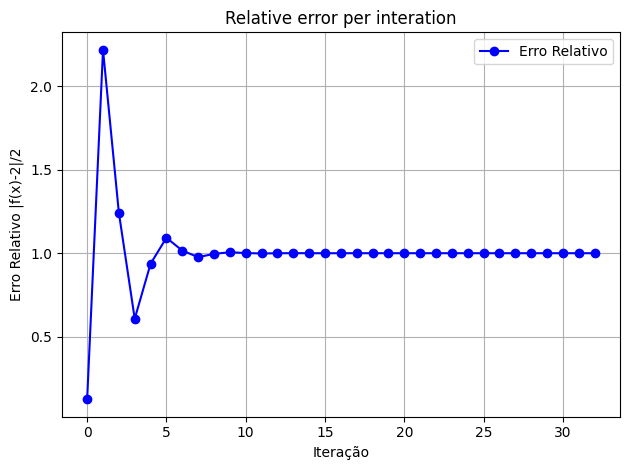

In [8]:
# Relative error
y_values = [abs((f(xs[i])-2)/2) for i in range(len(xs))]
plt.plot(range(len(xs)), y_values, 'bo-', label='Erro Relativo')

plt.xlabel('Iteração')
plt.ylabel('Erro Relativo |f(x)-2|/2')
plt.title('Relative error per interation')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

#  Newton Raphson method

In [14]:
def my_newton_raphson(f, df, x0, max_iter = 1000, tol = 1e-6):
    xs = [x0]
    x= x0
    for i in range(max_iter):
      fx = f(x)
      dfx = df(x)
      if abs(fx) < tol:
          break
      x_new = x - fx / dfx
      xs.append(x)
      if abs(x_new - x) < tol:
          break
      x = x_new
    xs.append(x)
    return xs


In [15]:
x0 = 100
my_newton_raphson(f, df, x0, 1000, 1e-6)

[100,
 100,
 50.02,
 25.04998400639744,
 12.604832373535455,
 6.461085492374608,
 3.54008825558513,
 2.3350017942701276,
 2.0240312882070577,
 2.000142661533015,
 2.0000000050877156]

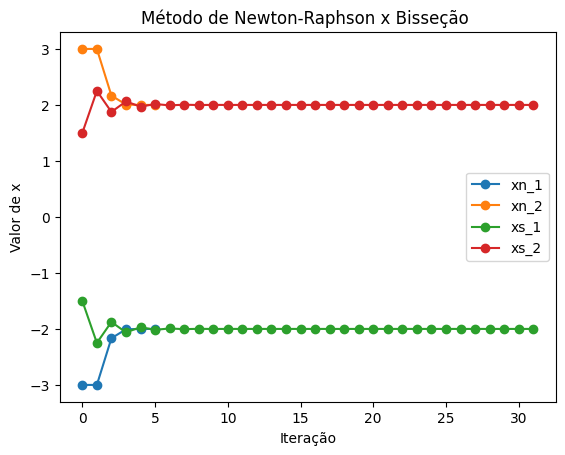

In [22]:
xn_1 = my_newton_raphson(f,df, -3)
xn_2 = my_newton_raphson(f,df, 3)

xs_1 = my_bissecao(f,-3,0)
xs_2 = my_bissecao(f,0,3)



plt.plot(xn_1, 'o-', label = 'xn_1')
plt.plot(xn_2, 'o-', label = 'xn_2')
plt.plot(xs_1, 'o-', label = 'xs_1')
plt.plot(xs_2, 'o-', label = 'xs_2')
plt.xlabel('Iteração')
plt.ylabel('Valor de x')
plt.title('Método de Newton-Raphson x Bisseção ')
plt.legend()
plt.show()


## error (methods)


In [27]:
xn_1

[-3,
 -3,
 -2.1666666666666665,
 -2.0064102564102564,
 -2.0000102400262145,
 -2.000000000026214]

In [38]:
error_xn_1  = abs(np.subtract(xn_1, -2 ))
error_xn_2  = abs(np.subtract(xn_2, 2 ))

error_xs_1 = abs(np.subtract(xs_1, -2 ))
error_xs_2 = abs(np.subtract(xs_2, 2 ))

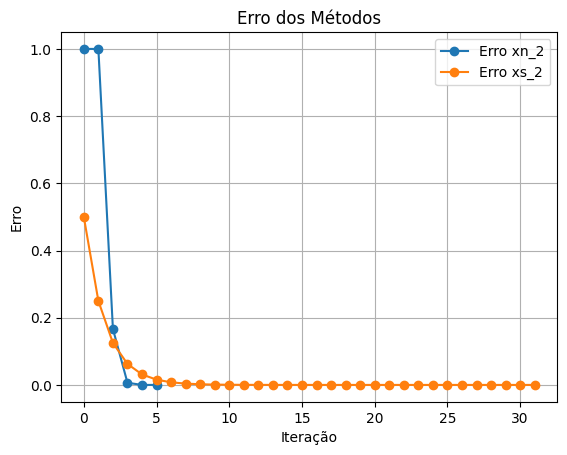

In [39]:


#plt.plot(range(len(error_xn_1)), error_xn_1, 'o-', label='Erro xn_1')
plt.plot(range(len(error_xn_2)), error_xn_2, 'o-', label='Erro xn_2')
#plt.plot(range(len(error_xs_1)), error_xs_1, 'o-', label='Erro xs_1')
plt.plot(range(len(error_xs_2)), error_xs_2, 'o-', label='Erro xs_2')

plt.xlabel('Iteração')
plt.ylabel('Erro')
plt.title('Erro dos Métodos')
plt.legend()
plt.grid(True)
plt.show()


## Homework

In [49]:
def g(x):
  return x**4

def dg(x):
  return 4*x**3

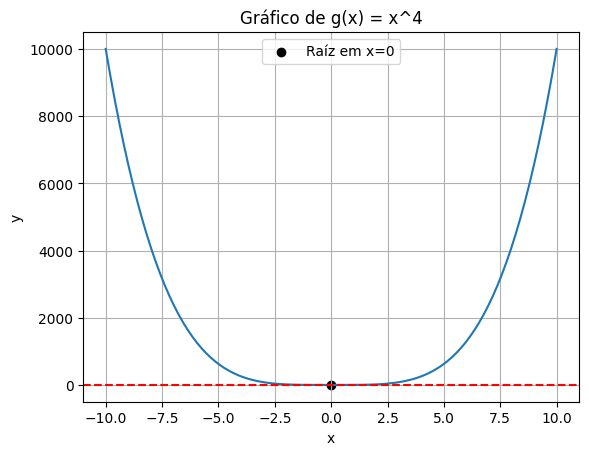

In [50]:
x = np.linspace(-10, 10, 100)
y = g(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de g(x) = x^4')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.scatter(0, 0, color='black', label='Raíz em x=0')
plt.legend()
plt.show()


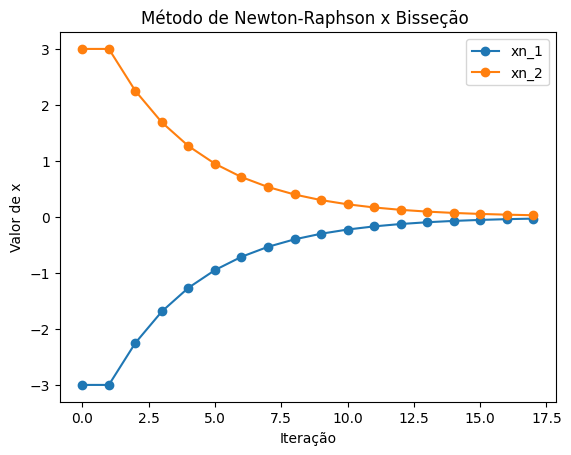

In [55]:
xn_1 = my_newton_raphson(g,dg, -3)
xn_2 = my_newton_raphson(g,dg, 3)

# bissection isnt work here
# xs_1 = my_bissecao(g,-3,0)
# xs_2 = my_bissecao(g,0,3)



plt.plot(xn_1, 'o-', label = 'xn_1')
plt.plot(xn_2, 'o-', label = 'xn_2')
plt.xlabel('Iteração')
plt.ylabel('Valor de x')
plt.title('Método de Newton-Raphson x Bisseção ')
plt.legend()
plt.show()


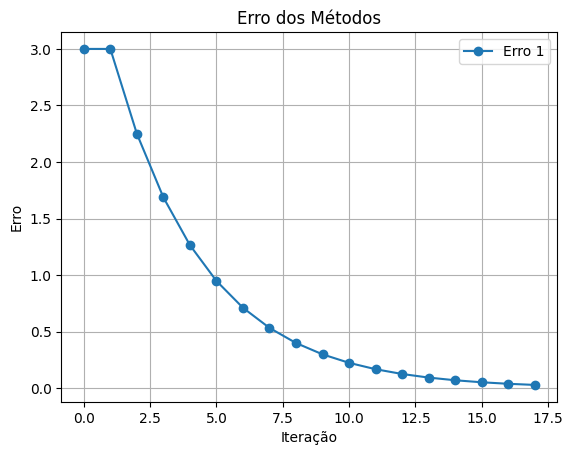

In [59]:
error_xn_1  = abs(np.subtract(xn_1, 0 ))

plt.plot(range(len(error_xn_1)), error_xn_1, 'o-', label='Erro 1')
plt.xlabel('Iteração')
plt.ylabel('Erro')
plt.title('Erro dos Métodos')
plt.legend()
plt.grid(True)
plt.show()


In [92]:
def y(x):
  return 1/x

def dy(x):
  return -1/(x**2)

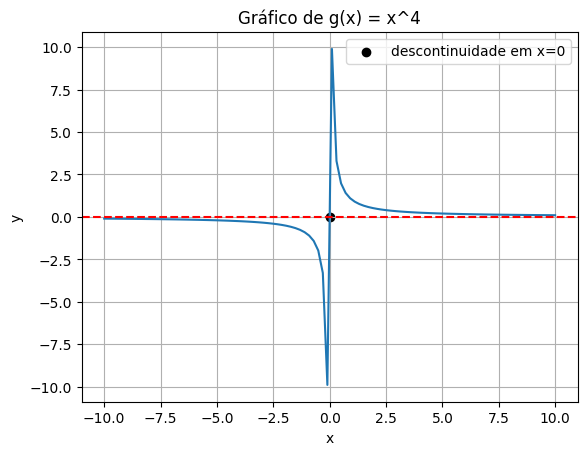

In [93]:
x = np.linspace(-10, 10, 100)

plt.plot(x, y(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de g(x) = x^4')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.scatter(0, 0, color='black', label='descontinuidade em x=0')
plt.legend()
plt.show()

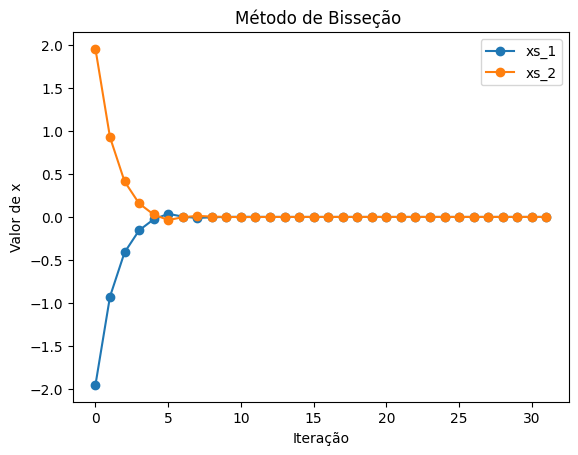

In [97]:
xs_1 = my_bissecao(y,-4,0.1)
xs_2 = my_bissecao(y,-0.1,4)


plt.plot(xs_1, 'o-', label = 'xs_1')
plt.plot(xs_2, 'o-', label = 'xs_2')
plt.xlabel('Iteração')
plt.ylabel('Valor de x')
plt.title('Método de Bisseção ')
plt.legend()
plt.show()


## Scipy methods way

In [107]:
opt.bisect(y, -2, 1, full_output=  True)

(-4.547473508864641e-13,
       converged: True
            flag: converged
  function_calls: 43
      iterations: 41
            root: -4.547473508864641e-13
          method: bisect)

In [108]:
opt.newton(lambda x: x**2-4, -2, 1, full_output= True)

(np.float64(-2.0),
       converged: True
            flag: converged
  function_calls: 1
      iterations: 0
            root: -2.0
          method: newton)

In [111]:
def k(x,a):
  return x**2+a

opt.bisect(k, -2, 1,args = (-4,), full_output = True)

(-2.0,
       converged: True
            flag: converged
  function_calls: 2
      iterations: 9635360
            root: -2.0
          method: bisect)

In [113]:
def k(x,a,b):
  return a*x**2+ b

opt.bisect(k, -2, 1,args = (1,-4), full_output = True)

(-2.0,
       converged: True
            flag: converged
  function_calls: 2
      iterations: 9635360
            root: -2.0
          method: bisect)

In [114]:
# If you dont let the derivate the method calc this by the finites dif
def k(x):
  return x ** 2-4

opt.newton(k, -3,full_output = True)

(np.float64(-2.0000000000000084),
       converged: True
            flag: converged
  function_calls: 7
      iterations: 6
            root: -2.0000000000000084
          method: secant)

In [115]:
def k(x):
  return x ** 2-4
def dk(x):
  return 2*x

opt.newton(k, -3,fprime = dk,full_output = True)

(np.float64(-2.0),
       converged: True
            flag: converged
  function_calls: 10
      iterations: 5
            root: -2.0
          method: newton)